<a href="https://colab.research.google.com/github/obielin/Palestine_News_Analysis/blob/main/Text_visualisation_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semantic Analysis and Clustering of News Descriptions
This notebook demonstrates an advanced text analysis approach, leveraging machine learning models to understand the semantic space of news article descriptions. Starting with loading the cleaned news data, we employ sentence transformers to encode the descriptions into high-dimensional semantic embeddings. These embeddings are then visualized and clustered to uncover inherent structures and themes within the data.

### Setting Up the Environment and Loading Data
Initially, we mount Google Drive to access the dataset and import necessary libraries, including Pandas for data manipulation, Matplotlib and Seaborn for basic visualizations, and various machine learning libraries for text encoding and dimensionality reduction:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#install neccessary packages
%pip install umap-learn
%pip install plotly
%pip install transformers
%pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=cefaaed7a0419b751e96af976e12daf9f89daa32f64438aca3c67dc8bbbb9dbf
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 1.6 MB/s eta 0:00:00


In [ ]:
#import neccessary packages
from sklearn.mixture import GaussianMixture
from umap import UMAP
import plotly.express as px
from sentence_transformers import SentenceTransformer

In [ ]:
#Import neccesary libraries
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModel
from sentence_transformers.util import cos_sim

In [ ]:
!pip install transformers umap-learn

### Load the data set
We then load the cleaned news dataset, which has been preprocessed to enhance the quality of the text data:

In [ ]:
#Loading the dataset
file_path = "/content/drive/MyDrive/cleaned_news_data.csv"
df= pd.read_csv(file_path)
df.head(5)

,headline,description,date,headline_word_count,description_word_count,stop_word_count,url_count
0,Pho­tos: Fears over Al-Aqsa stained-glass win­...,israeli raids alaqsa mosque compound led windo...,2014-03-10,6,15,5,0
1,The War in June 1967,june 1967 arabisraeli war lasted six days cons...,2017-02-06,5,20,6,0
2,Pales­tine and the UN’s ‘re­spon­si­bil­i­ty t...,p2p doctrine un must deploy palestine protect ...,2021-01-06,8,18,5,0
3,Fear bar­ri­er bro­ken de­spite hun­dreds of a...,israeli forces attempting reassert control pal...,2021-01-06,9,17,6,0
4,Is­rael rolls back gen­er­al’s com­ments on bo...,benny gantz says military chief spoke figurati...,2021-01-06,10,15,2,0


### Load the transformer model

In [ ]:
# Load the model
model = SentenceTransformer('thenlper/gte-small')

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### Semantic Embeddings and Similarity Analysis
Using the SentenceTransformer model, we convert the news descriptions into semantic embeddings. This transformation enables us to measure the cosine similarity between articles, offering a glimpse into their semantic relatedness:

In [ ]:
# Encode the descriptions to get embeddings
embeddings = model.encode(df['description'].tolist())

In [ ]:
# Compute cosine similarity between the first two descriptions
if len(embeddings) > 1:
    similarity = cos_sim(embeddings[0], embeddings[1])
    print("Cosine Similarity:", similarity)

Cosine Similarity: tensor([[0.7938]])


### Dimensionality Reduction and Visualization
To visualize the high-dimensional data, we apply UMAP (Uniform Manifold Approximation and Projection) for dimensionality reduction, reducing the embeddings to a three-dimensional space. This step facilitates the exploration of the semantic space of the news descriptions:

In [ ]:
#  Dimensionality Reduction with UMAP
umap_model = UMAP(n_components=3, random_state=42, n_neighbors=30, min_dist=0.0, metric='cosine')
red_embeddings = umap_model.fit_transform(embeddings)

In [ ]:
red_embeddings.shape

(3338, 3)

The reduced embeddings are visualized using Plotly, creating interactive 3D scatter plots that help identify clusters and patterns in the data.

In [ ]:
import plotly.graph_objects as go

def create_3d_scatter_plot(embeddings, hover_text, title):
    # Use one of the dimensions for coloring
    color = embeddings[:, 0]

    fig = go.Figure(data=[go.Scatter3d(
        x=embeddings[:, 0],
        y=embeddings[:, 1],
        z=embeddings[:, 2],
        mode='markers',
        text=hover_text,
        marker=dict(
            size=5,
            opacity=0.8,
            color=color,  # Assign colors based on the first dimension
            colorscale='Viridis',  # Color scale
            colorbar=dict(title='Color Scale')  # Color scale bar
        )
    )])

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title='UMAP Component 1',
            yaxis_title='UMAP Component 2',
            zaxis_title='UMAP Component 3'
        ),
        hovermode='closest'
    )

    return fig

In [ ]:
#Create 3d plot of embeddings
fig = create_3d_scatter_plot(red_embeddings, df['description'], '3D Visualization of Data')
fig.show()

### Clustering Analysis
We explore clustering techniques, including K-Means and Gaussian Mixture Models (GMM), to categorize the news descriptions into distinct groups based on their semantic content. The Elbow Method and Bayesian Information Criterion (BIC) are used to determine the optimal number of clusters:

In [ ]:
# Dimensionality Reduction with UMAP
umap_model = UMAP(n_components= 500, random_state=42, n_neighbors=15, min_dist=0.0, metric='cosine')
clust_embeddings = umap_model.fit_transform(embeddings)

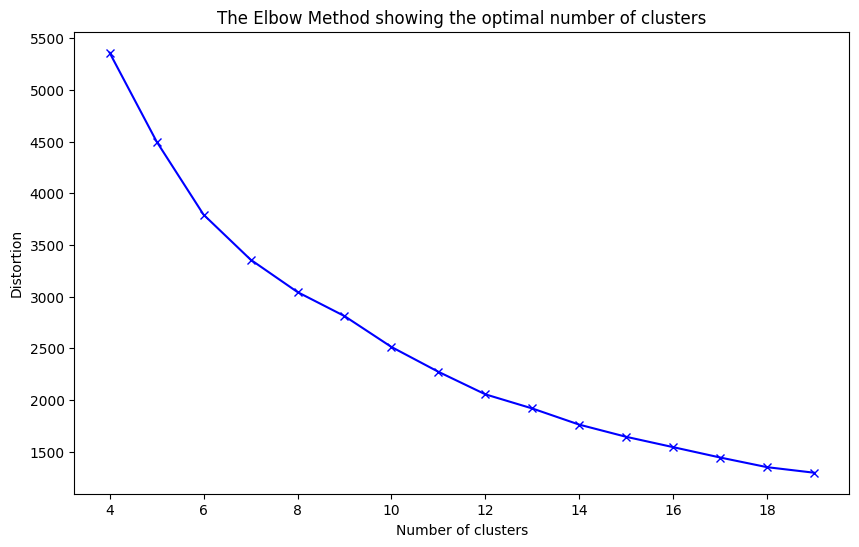

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# using red_rembeddings
distortions = []
K = range(4, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(clust_embeddings)
    distortions.append(kmeanModel.inertia_)

# Plotting the Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()


In [ ]:
import plotly.graph_objects as go

def create_3d_scatter_plot(embeddings, cluster_labels, hover_text, title):
    fig = go.Figure(data=[go.Scatter3d(
        x=embeddings[:, 0],
        y=embeddings[:, 1],
        z=embeddings[:, 2],
        mode='markers',
        text=hover_text,
        marker=dict(
            size=5,
            opacity=0.8,
            color=cluster_labels,  # Use cluster labels for coloring
            colorscale='Viridis',  # choose any colorscale
            colorbar=dict(title='Cluster')
        )
    )])

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title='UMAP Component 1',
            yaxis_title='UMAP Component 2',
            zaxis_title='UMAP Component 3'
        ),
        hovermode='closest'
    )

    return fig

# Example usage with the corrected function
kmeans_labels = KMeans(n_clusters=6).fit_predict(clust_embeddings)
fig = create_3d_scatter_plot(red_embeddings, kmeans_labels, df['description'], '3D Visualization of Data')
fig.show()


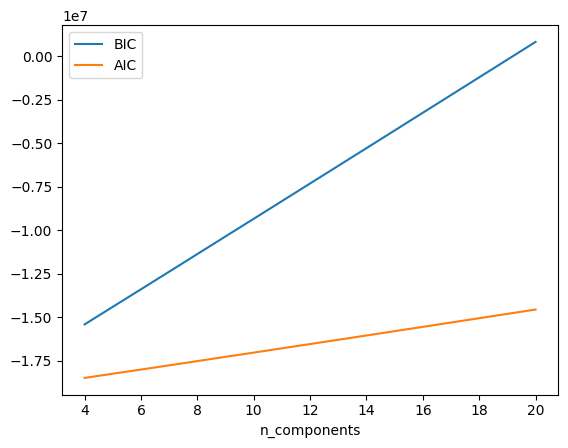

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture as GMM
n_components = np.arange(4, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(clust_embeddings)
          for n in n_components]

plt.plot(n_components, [m.bic(clust_embeddings) for m in models], label='BIC')
plt.plot(n_components, [m.aic(clust_embeddings) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [ ]:
#Obtain the cluster labels using the .predict() method on your fitted GMM.
gmm = GMM(4, covariance_type='full', random_state=0).fit(clust_embeddings)
cluster_labels = gmm.predict(clust_embeddings)


In [ ]:
fig = create_3d_scatter_plot(red_embeddings, cluster_labels, df['description'], '3D Visualization of Data')
fig.show()
